## Install Pandas with Jupyter

```
!pip install -U pandas
```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from random import randint

In [3]:
def coef_rand(N, MIN=10, MAX=99):
    list_coef = [randint(MIN, MAX) for _ in range(N)]
    return list_coef

In [4]:
coef = coef_rand(100, 10, 99)

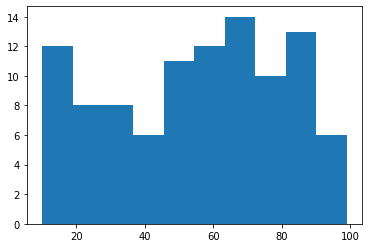

In [5]:
plt.hist(coef)
plt.show()

In [6]:
coef = coef_rand(1000000, 10, 99)

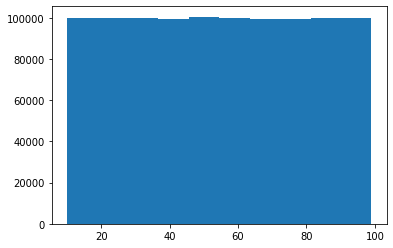

In [7]:
plt.hist(coef)
plt.show()

In [8]:
def x_rand():
    return randint(1, 3)

In [9]:
print(x_rand())
print(x_rand())
print(x_rand())

2
1
2


In [10]:
def func(list_coef, x):
    result = 0
    for n, coef in enumerate(list_coef):
        result +=  coef * x ** n
    return result

In [11]:
X = x_rand()
coefs = coef_rand(18)
func(coefs, X)

1095

In [12]:
func(coefs, X)

1095

In [13]:
from timeit import default_timer as timer

In [14]:
def main(coef, x):
    started_time = timer()
    result = func(coef, x)
    end_time = timer()

    dic = {
        'timer': (end_time - started_time)
    }
    
    return dic

In [15]:
main(coefs, X)

{'timer': 2.4542603952430185e-05}

In [16]:
import pandas as pd

In [17]:
datas = [main(coefs, X) for _ in range(2)]

In [18]:
datas

[{'timer': 1.5618020696939183e-05}, {'timer': 1.1601958231910459e-05}]

In [19]:
pd.DataFrame(datas)

,timer
0,0.000016
1,0.000012


In [20]:
datas = [main(coefs, X) for _ in range(1000000)]

In [21]:
df = pd.DataFrame(datas)

In [22]:
df.head(n=2)

,timer
0,0.000017
1,0.000013


In [23]:
df[df.timer == df.timer.max()]

,timer
5502,0.03836


In [24]:
df.timer.describe()

count    1000000.000000
mean           0.000011
std            0.000039
min            0.000009
25%            0.000010
50%            0.000010
75%            0.000011
max            0.038360
Name: timer, dtype: float64

In [25]:
df['timer_mil'] = df.timer*1000
df['timer_dez_mil'] = df.timer*10000

In [26]:
df.timer_mil.describe()

count    1000000.000000
mean           0.010873
std            0.038520
min            0.009371
25%            0.010263
50%            0.010263
75%            0.010709
max           38.360090
Name: timer_mil, dtype: float64

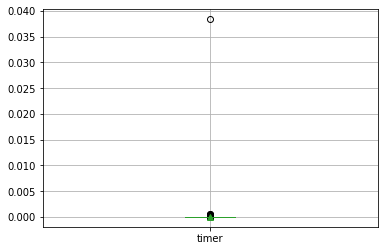

In [27]:
df.boxplot(column=['timer'], showmeans=True)

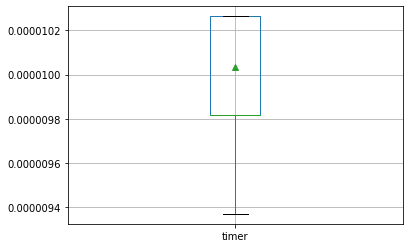

In [28]:
df.iloc[df.timer.sort_values(ascending=False).index[800000:]].boxplot(column=['timer'], showmeans=True)

In [29]:
from multiprocessing import Pool
from functools import partial

In [30]:
def chronos(COEFS, X, N_POOL, RUNS, i):
    started_time = timer()
    result = func(COEFS, X)
    end_time = timer()

    dic = {
        'timer': (end_time - started_time),
        'num_pool': N_POOL,
        'range': RUNS,
        'id': i
    }
    
    return dic

In [32]:
X = 3
coefs = coef_rand(18)
N = 3
results = []
for num_pool in range(1, N + 1):
    for runs in range(1, N + 1):
        _chronos  = partial(chronos, coefs, X, num_pool, runs)
        result = map(_chronos, [i for i in range(runs)])
        df = pd.DataFrame(result)
        results.append(df)

In [33]:
dfs = pd.concat(results, ignore_index=True)

In [34]:
dfs

,id,num_pool,range,timer
0,0,1,1,0.000022
1,0,1,2,0.000031
2,1,1,2,0.000024
3,0,1,3,0.000021
4,1,1,3,0.000017
5,2,1,3,0.000016
6,0,2,1,0.000025
7,0,2,2,0.000032
8,1,2,2,0.000027
9,0,2,3,0.000027


In [ ]:
if __name__ == '__main__':
    X = 3
    coefs = coef_rand(18)
    N = 20
    results = []
    for num_pool in range(1, N + 1):
        for runs in range(1, N + 1):
            pool = Pool(processes=num_pool)
            _chronos  = partial(chronos, coefs, X, num_pool, runs)
            result = pool.map(_chronos, [i for i in range(runs)])
            pool.close()
            pool.join()
            df = pd.DataFrame(result)
            results.append(df)

In [ ]:
dfs = pd.concat(results, ignore_index=True)

In [ ]:
dfs

In [ ]:
dfs.to_csv('datatest.csv', index=False)